In [1]:
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pre-processing

In [2]:
data = pd.read_csv('data/wide_chts_data.csv')
# data.with_column('age_ctgry', 0)

In [3]:
data['age_ctgry']=[0]*len(data['age'])
data.loc[data['age']>4,'age_ctgry']=1
data.loc[data['age']>19,'age_ctgry']=2
data.loc[data['age']>44,'age_ctgry']=3
data.loc[data['age']>64,'age_ctgry']=4
data



,observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,...,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry
0,1,1,1,1,1,1,1,1,1,1,...,9.10,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,3
1,2,1,1,1,1,1,1,1,1,1,...,9.10,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,3
2,3,2,1,1,1,1,1,1,0,0,...,31.94,NaN,NaN,9.1125,5.2071,3.6450,6.95,7.75,5.98,3
3,4,8,0,1,1,1,0,1,1,1,...,2.23,2.14,2.14,NaN,0.2355,0.1649,3.22,NaN,3.22,3
4,5,7,0,1,1,1,0,1,1,1,...,0.96,0.96,0.96,NaN,0.1014,0.0710,3.22,NaN,3.22,3
5,6,2,1,1,1,1,1,1,1,1,...,7.40,7.16,7.16,1.3675,0.7815,0.5470,3.22,3.98,3.22,3
6,7,1,1,1,1,1,1,1,1,1,...,9.47,9.24,9.24,1.7501,1.0000,0.7000,3.22,3.22,3.22,3
7,8,3,1,1,1,1,1,1,1,1,...,4.70,4.70,4.70,0.8686,0.4964,0.3474,3.22,3.22,3.22,1
8,9,4,1,1,1,1,1,1,1,0,...,4.87,4.78,NaN,0.9000,0.5143,0.3600,3.22,3.22,3.22,3
9,10,7,1,1,1,1,1,1,1,1,...,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,3


In [4]:
data.columns
data['tt'] = 0 
data['cost'] = 0 
data['distance'] = 0 

data['da_tt'] = 0
data['s2_tt'] = 0
data['s3_tt'] = 0
data['wtw_tt'] = 0
data['dtw_tt'] = 0
data['wtd_tt'] = 0
data['walk_tt'] = 0
data['bike_tt'] = 0

data['da_cost'] = 0
data['s2_cost'] = 0
data['s3_cost'] = 0
data['wtw_cost'] = 0
data['dtw_cost'] = 0
data['wtd_cost'] = 0
data['walk_cost'] = 0 
data['bike_cost'] = 0


data[['da_tt', 's2_tt', 's3_tt','wtw_tt','dtw_tt','dtw_tt','wtd_tt','walk_tt','bike_tt']]=0
data[['da_cost', 's2_cost', 's3_cost','wtw_cost','dtw_cost','dtw_cost','wtd_cost','walk_cost','bike_cost']]=0

# df.loc[df['x'] < -2, 'y'] = 1
data.loc[data['choice']==1,'tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']==2,'tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']==3,'tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']==4,'tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']==5,'tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']==6,'tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']==7,'tt'] = data['total_travel_time_walk']
data.loc[data['choice']==8,'tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']==1,'cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']==2,'cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']==3,'cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']==4,'cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']==5,'cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']==6,'cost'] = data['total_travel_cost_walk_transit_drive']

data.loc[data['choice']==1,'distance'] = data['total_travel_distance_drive_alone']
data.loc[data['choice']==2,'distance'] = data['total_travel_distance_shared_ride_2']
data.loc[data['choice']==3,'distance'] = data['total_travel_distance_shared_ride_3+']
data.loc[data['choice']==7,'distance'] = data['total_travel_distance_walk']
data.loc[data['choice']==8,'distance'] = data['total_travel_distance_bicycle']


data.loc[data['choice']==1,'da_tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']==2,'s2_tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']==3,'s3_tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']==4,'wtw_tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']==5,'dtw_tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']==6,'wtd_tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']==7,'walk_tt'] = data['total_travel_time_walk']
data.loc[data['choice']==8,'bike_tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']==1,'da_cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']==2,'s2_cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']==3,'s3_cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']==4,'wtw_cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']==5,'dtw_cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']==6,'wtd_cost'] = data['total_travel_cost_walk_transit_drive']

In [5]:
data['total_travel_time_drive_alone']
data[['tt','cost']]

data.to_csv('data/modechoice.csv', index=False)

# mode choice plots

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mc = Table.read_table('data/modechoice.csv')

## x-axis below is messed up

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


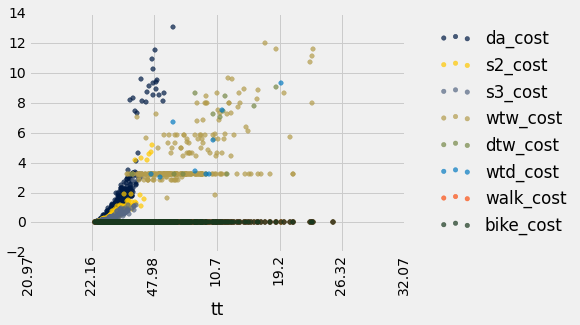

In [7]:

# mc.select(['tt','cost']).scatter('tt')
mc.select(['da_cost', 's2_cost', 's3_cost','wtw_cost','dtw_cost', 
           'dtw_cost','wtd_cost', 'walk_cost', 'bike_cost','tt']).scatter('tt')


## Using matplotlib scatter instead

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


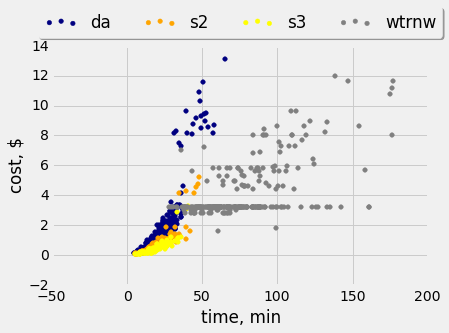

In [8]:
plt.scatter(mc.where('choice',1).column('tt'), mc.where('choice',1).column('cost'), color='navy', label ='da')
plt.scatter(mc.where('choice',2).column('tt'), mc.where('choice',2).column('cost'), color='orange', label= 's2')
plt.scatter(mc.where('choice',3).column('tt'), mc.where('choice',3).column('cost'), color='yellow', label='s3')
plt.scatter(mc.where('choice',4).column('tt'), mc.where('choice',4).column('cost'), color='grey', label = 'wtrnw')
plt.legend(loc='upper center', shadow=True, fancybox=True, ncol=4, bbox_to_anchor=(0.5, 1.2))
plt.ylabel('cost ($)')
plt.xlabel('time (min)')


## Travel time vs. distance for bike and walk

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


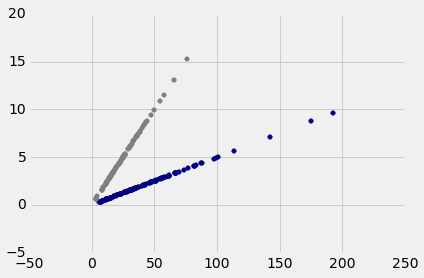

In [9]:
# mc.where('choice',8)

plt.scatter(mc.where('choice',7).column('tt'),
            mc.where('choice',7).column('total_travel_distance_walk'), 
            color='navy')

plt.scatter(mc.where('choice',8).column('tt'),
            mc.where('choice',8).column('total_travel_distance_bicycle'), 
        color='grey')

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


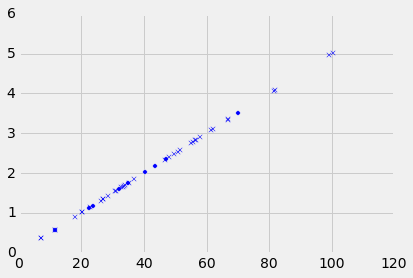

In [10]:
plt.scatter(mc.where('choice',7).where('age_ctgry',4).column('tt'),
            mc.where('choice',7).where('age_ctgry',4).column('total_travel_distance_walk'))
plt.scatter(mc.where('choice',7).where('age_ctgry',2).column('tt'),
            mc.where('choice',7).where('age_ctgry',2).column('total_travel_distance_walk'), marker='x')

(array([ 0.,  2.,  2.,  3.,  4.,  3.,  6.,  0.,  1.,  4.,  5.,  2.,  2.,
         0.,  0.,  2.,  0.,  0.,  1.]),
 array([   1.        ,    6.21052632,   11.42105263,   16.63157895,
          21.84210526,   27.05263158,   32.26315789,   37.47368421,
          42.68421053,   47.89473684,   53.10526316,   58.31578947,
          63.52631579,   68.73684211,   73.94736842,   79.15789474,
          84.36842105,   89.57894737,   94.78947368,  100.        ]),
 <a list of 19 Patch objects>)

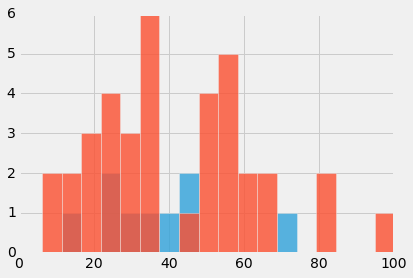

In [11]:
bins = np.linspace(1,100,20)
plt.hist(mc.where('choice',7).where('age_ctgry',4).column('tt'), alpha = .8, bins=bins)
plt.hist(mc.where('choice',7).where('age_ctgry',2).column('tt'), alpha = .8, bins=bins)

# plt.hist(mc.where('choice',8).where('age_ctgry',4).column('tt'), alpha = .8, bins=bins)
# plt.hist(mc.where('choice',8).where('age_ctgry',2).column('tt'), alpha = .8, bins=bins)


In [12]:
mc.where('choice',4)

observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,household_id,person_id,tour_id,tour_origin_taz,primary_dest_taz,age,household_size,household_income,household_income_values,transit_subsidy,transit_subsidy_amount,cross_bay,total_travel_time_drive_alone,total_travel_time_shared_ride_2,total_travel_time_shared_ride_3+,total_travel_time_walk_transit_walk,total_travel_time_drive_transit_walk,total_travel_time_walk_transit_drive,total_travel_time_walk,total_travel_time_bicycle,total_travel_distance_drive_alone,total_travel_distance_shared_ride_2,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry,tt,cost,distance,da_tt,s2_tt,s3_tt,wtw_tt,dtw_tt,wtd_tt,walk_tt,bike_tt,da_cost,s2_cost,s3_cost,wtw_cost,dtw_cost,wtd_cost,walk_cost,bike_cost
9,4,1,1,1,1,1,1,1,0,1069723,1,0,86,12,50,2,5,62500,0,-1,0,21.93,21.93,21.93,54.13,42.72,44.78,95.6,nan,4.87,4.87,4.87,4.78,nan,0.9,0.5143,0.36,3.22,3.22,3.22,3,54.13,3.22,0,0,0,0,54.13,0,0,0,0,0,0,0,3.22,0,0,0,0
15,4,1,1,1,1,1,1,1,1,1119137,1,0,168,133,71,2,6,87500,0,-1,0,13.87,13.87,13.87,50.26,39.46,38.7,78.4,19.6,3.92,3.92,3.92,3.92,3.92,0.7244,0.414,0.2898,3.22,3.22,3.22,4,50.26,3.22,0,0,0,0,50.26,0,0,0,0,0,0,0,3.22,0,0,0,0
16,4,1,1,1,1,1,1,1,1,1119137,2,0,168,133,58,2,6,87500,0,-1,0,13.87,13.87,13.87,50.26,39.46,38.7,78.4,19.6,3.92,3.92,3.92,3.92,3.92,0.7244,0.414,0.2898,3.22,3.22,3.22,3,50.26,3.22,0,0,0,0,50.26,0,0,0,0,0,0,0,3.22,0,0,0,0
17,4,1,1,1,1,1,1,1,0,1119607,1,0,139,9,31,1,6,87500,1,62,0,22.39,22.39,22.39,66.25,58.76,53.41,144.4,nan,7.9,7.9,7.9,7.22,nan,1.4599,0.8343,0.584,3.22,3.22,3.22,2,66.25,3.22,0,0,0,0,66.25,0,0,0,0,0,0,0,3.22,0,0,0,0
18,4,1,1,1,1,1,1,1,0,1120220,2,0,111,1,29,2,8,175000,1,40,0,21.11,21.11,21.11,64.2,57.15,63.48,110.6,nan,5.65,5.65,5.65,5.53,nan,1.0441,0.5966,0.4176,3.22,3.22,3.22,2,64.2,3.22,0,0,0,0,64.2,0,0,0,0,0,0,0,3.22,0,0,0,0
19,4,1,1,1,1,1,1,1,1,1121261,3,0,164,93,13,4,6,87500,0,-1,0,24.02,24.02,24.02,161,99.41,149.26,173.6,43.4,9.99,9.99,9.99,8.68,8.68,1.8462,1.0549,0.7385,3.22,3.22,5.55,1,161,3.22,0,0,0,0,161,0,0,0,0,0,0,0,3.22,0,0,0,0
20,4,1,1,1,1,1,1,1,1,1121261,4,0,164,93,11,4,6,87500,0,-1,0,24.02,24.02,24.02,161,99.41,149.26,173.6,43.4,9.99,9.99,9.99,8.68,8.68,1.8462,1.0549,0.7385,3.22,3.22,5.55,1,161,3.22,0,0,0,0,161,0,0,0,0,0,0,0,3.22,0,0,0,0
23,4,0,1,1,1,0,1,1,1,1128764,1,0,87,117,51,3,5,62500,0,-1,0,nan,24.32,24.32,77.64,nan,75.62,127,31.75,nan,6.58,6.58,6.35,6.35,nan,0.6948,0.4864,4.63,nan,3.22,3,77.64,4.63,0,0,0,0,77.64,0,0,0,0,0,0,0,4.63,0,0,0,0
24,4,0,1,1,1,0,1,1,1,1128764,2,0,87,117,50,3,5,62500,0,-1,0,nan,24.32,24.32,77.64,nan,75.62,127,31.75,nan,6.58,6.58,6.35,6.35,nan,0.6948,0.4864,4.63,nan,3.22,3,77.64,4.63,0,0,0,0,77.64,0,0,0,0,0,0,0,4.63,0,0,0,0
27,4,1,1,1,1,1,1,0,0,1129102,2,0,156,1019,18,4,2,17500,1,999998,1,54.66,54.66,54.66,177.03,159.72,165.79,nan,nan,33.85,33.85,33.8,nan,nan,11.0755,6.3289,3.3025,11.62,8.92,9.32,1,177.03,11.62,0,0,0,0,177.03,0,0,0,0,0,0,0,11.62,0,0,0,0


## Plot mode not chosen of da and walk to transit with '+' marker

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


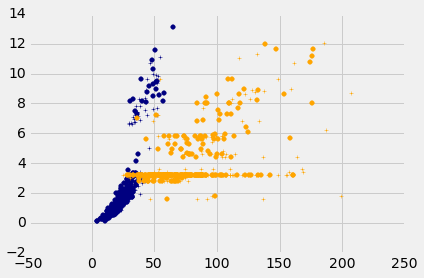

In [13]:
plt.scatter(mc.where('choice',1).column('tt'), mc.where('choice',1).column('cost'), color='navy')
plt.scatter(mc.where('choice',4).column('total_travel_time_drive_alone'), 
            mc.where('choice',4).column('total_travel_cost_drive_alone'), color='navy', marker = '+')
plt.scatter(mc.where('choice',4).column('tt'), mc.where('choice',4).column('cost'), color='orange')
plt.scatter(mc.where('choice',1).column('total_travel_time_walk_transit_walk'), 
            mc.where('choice',1).column('total_travel_cost_walk_transit_walk'), color='orange', marker = '+')

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


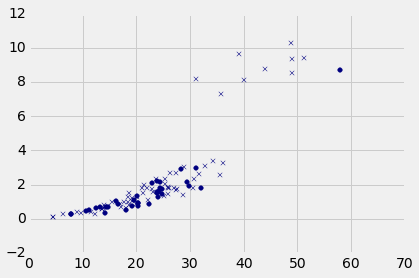

In [14]:
plt.scatter(mc.where('choice',1).where('age_ctgry',4).column('tt'), 
            mc.where('choice',1).where('age_ctgry',4).column('cost'), color='navy')
plt.scatter(mc.where('choice',1).where('age_ctgry',2).column('tt'), 
            mc.where('choice',1).where('age_ctgry',2).column('cost'), color='navy', marker='x')